In [19]:
import pandas as pd


df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4uqDgqzczkc_l9PAY9p2imhhAMDggN47qeJf4vaz5691T3Hk-YrWoxALT6OTvc40q86imlbKx3pks/pub?output=csv')
df.head()

,Timestamp,Model Year,Model Type,Purchase Date,Date of Issue,Mileage at occurrence,Additional context,Reddit username (NOTE: This will be public if provided!),Date of Manufacture (if known),"Location (Country/State, as nearest you are willing to share or you can leave blank)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/29/2023 14:15:37,2022.0,Limited AWD,2/17/2022,1/12/2023,10000.0,"Battery failed, was replaced, then car wouldn'...",Shidell,2/10/2022,NaN
2,3/29/2023 14:43:28,2022.0,Limited RWD,4/9/2022,1/8/2023,7155.0,Took about 40 days for fix. Car was returned f...,NaN,NaN,NaN
3,3/29/2023 14:54:08,2022.0,SE AWD,6/18/2022,11/20/2022,4000.0,"Does on me, jumped and brought to the dealersh...",Klosnor,NaN,NaN
4,3/29/2023 15:01:28,2022.0,Limited AWD,5/2/2022,1/18/2023,12000.0,"12v battery drain, cannot open doors or start ...",nationcrisis,NaN,NaN


In [20]:

# convert Date of Issue and Purchase Date to datetime
df['Date of Issue'] = pd.to_datetime(df['Date of Issue'])
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
# compute the months from time difference
df['months_until_failure_from_purchase'] = df['Date of Issue'] - df['Purchase Date']
df['months_until_failure_from_purchase'] = df['months_until_failure_from_purchase'].dt.days / 30

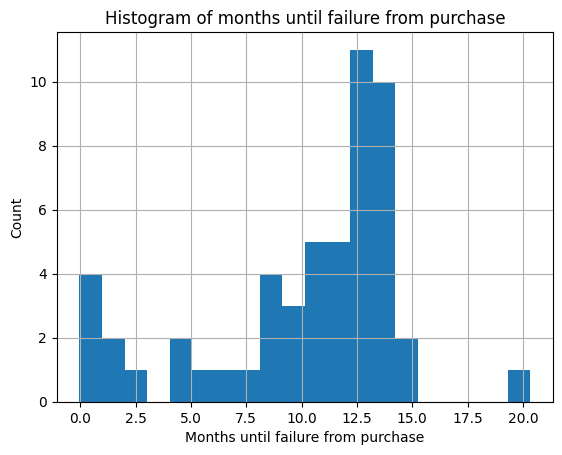

In [21]:
import matplotlib.pyplot as plt
# plot histogram of months until failure
df['months_until_failure_from_purchase'].hist(bins=20)
# add labels and title
plt.xlabel('Months until failure from purchase')
plt.ylabel('Count')
plt.title('Histogram of months until failure from purchase')
plt.show()

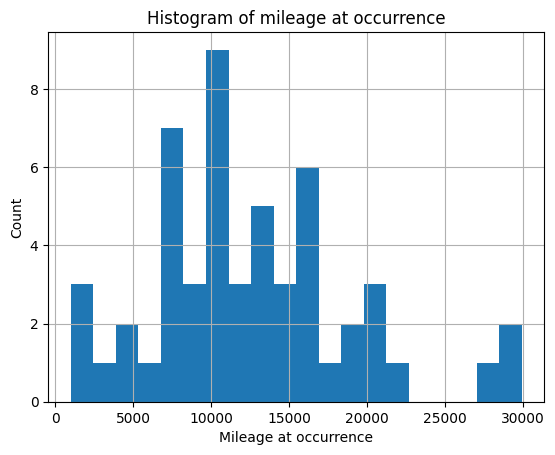

In [22]:
# plot histogram of mileage until failure
df['Mileage at occurrence'].hist(bins=20)
# add labels and title
plt.xlabel('Mileage at occurrence')
plt.ylabel('Count')
plt.title('Histogram of mileage at occurrence')
plt.show()


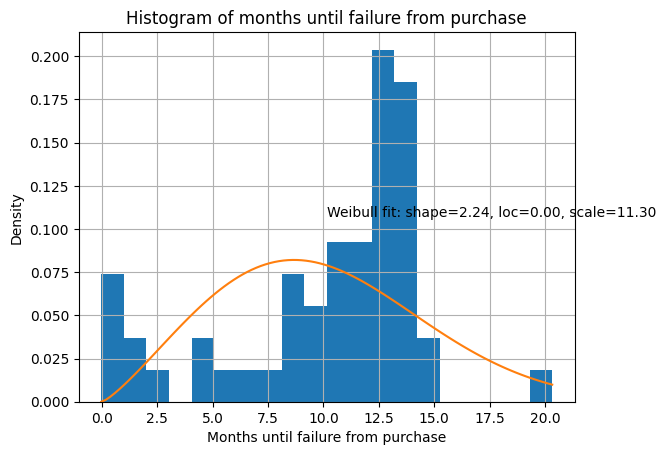

In [30]:
# only drop na values on the months_until_failure_from_purchase column
df = df.dropna(subset=['months_until_failure_from_purchase'])
import numpy as np
from scipy.stats import weibull_min
# fit the distribution
shape, loc, scale = weibull_min.fit(df['months_until_failure_from_purchase'], floc=0)
# plot the histogram
df['months_until_failure_from_purchase'].hist(bins=20, density=True)
# create a range of values to evaluate the distribution
x = np.linspace(df['months_until_failure_from_purchase'].min(), df['months_until_failure_from_purchase'].max(), 100)
# plot the pdf
plt.plot(x, weibull_min.pdf(x, shape, loc, scale))
# add labels and title
plt.xlabel('Months until failure from purchase')
plt.ylabel('Density')
# add label for weibull fit
plt.text(0.5, 0.5, 'Weibull fit: shape={:.2f}, loc={:.2f}, scale={:.2f}'.format(shape, loc, scale), transform=plt.gca().transAxes)
plt.title('Histogram of months until failure from purchase')
plt.show()


In [18]:
df['months_until_failure_from_purchase']

26    4.633333
Name: months_until_failure_from_purchase, dtype: float64